In [1]:
import os
import sys
import numpy as numpy
from numpy import ndarray
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot
from typing import List

base_dir: str = os.getcwd()
os.environ['LAMMPS_PYTHON_BASE_PATH'] =  os.path.join(base_dir, '../../../../../md-analysis-tutorial/python/src')
sys.path.append(os.getenv('LAMMPS_PYTHON_BASE_PATH'))

from modules.line_graph import LineGraph

# Extract unstretched PEG dihedral histogram data & calculate probability densities

In [2]:
rdf_path: str = os.path.join(base_dir, '../data/raw/dihedral-vs-time/')

# File contains columns of data, the .T transpose operation switches them to rows, making it easier to
# unpack into separate variables
# Extract unstretched PEG dihedral histogram data
(unstretched_bin, unstretched_dihedrals, unstretched_dihedrals_bin_counts,
 unstretched_bin_dihedral_count_total_fraction) = numpy.genfromtxt(
    os.path.join(rdf_path, 'initial_dihedral.histo'),
    skip_header=4,
    usecols=range(4)
).T

# The numpy.diff() method calculates the difference between consecutive elements in an array
# It can therefore be used to calculate the width of each bin from an array of bin center values (i.e. the
# `unstretched_dihedrals` in our case
# Because the first bin/element does not have a preceding bin to subtract from, it needs special handling.
# We therefore prepend the first element so the first bin/element can subtract from itself
unstretched_bin_widths = numpy.diff(unstretched_dihedrals, prepend=unstretched_dihedrals[0])

# Sum up all the dihedral counts across all bins to get total bin count
unstretched_total_bin_counts: int = numpy.sum(unstretched_dihedrals_bin_counts)

# Normalise bin counts to obtain probability density using previously calculate variables
unstretched_dihedrals_probability_density = (
        unstretched_dihedrals_bin_counts / (unstretched_total_bin_counts * unstretched_bin_widths)
)

/tmp/ipykernel_59188/2289062473.py:25: RuntimeWarning: divide by zero encountered in divide
  unstretched_dihedrals_bin_counts / (unstretched_total_bin_counts * unstretched_bin_widths)


# Extract stretched PEG dihedral histogram data & calculate probability densities

In [3]:
# Extract stretched PEG dihedral histogram data and calculate probability densities
(stretched_bin, stretched_dihedrals, stretched_dihedrals_bin_counts,
 stretched_bin_dihedral_count_total_fraction) = numpy.genfromtxt(
    os.path.join(rdf_path, 'final_dihedral.histo'),
    skip_header=4,
    usecols=range(4)
).T

stretched_bin_widths = numpy.diff(stretched_dihedrals, prepend=stretched_dihedrals[0])
stretched_total_bin_counts: int = numpy.sum(stretched_dihedrals_bin_counts)
stretched_dihedrals_probability_density = (
        stretched_dihedrals_bin_counts / (stretched_total_bin_counts * stretched_bin_widths)
)

# Combine unstretched dihedrals and unstretched dihedrals probability density into ndarray
dihedrals_probability_density_vs_angle_data_array: List[ndarray] = [
    numpy.vstack((unstretched_dihedrals, unstretched_dihedrals_probability_density)),
    numpy.vstack((stretched_dihedrals, stretched_dihedrals_probability_density))
]

/tmp/ipykernel_59188/1784363527.py:12: RuntimeWarning: divide by zero encountered in divide
  stretched_dihedrals_bin_counts / (stretched_total_bin_counts * stretched_bin_widths)


# Create Matplotlib graph to plot deformation dihedral angle probability distribution before & after PEG deformation

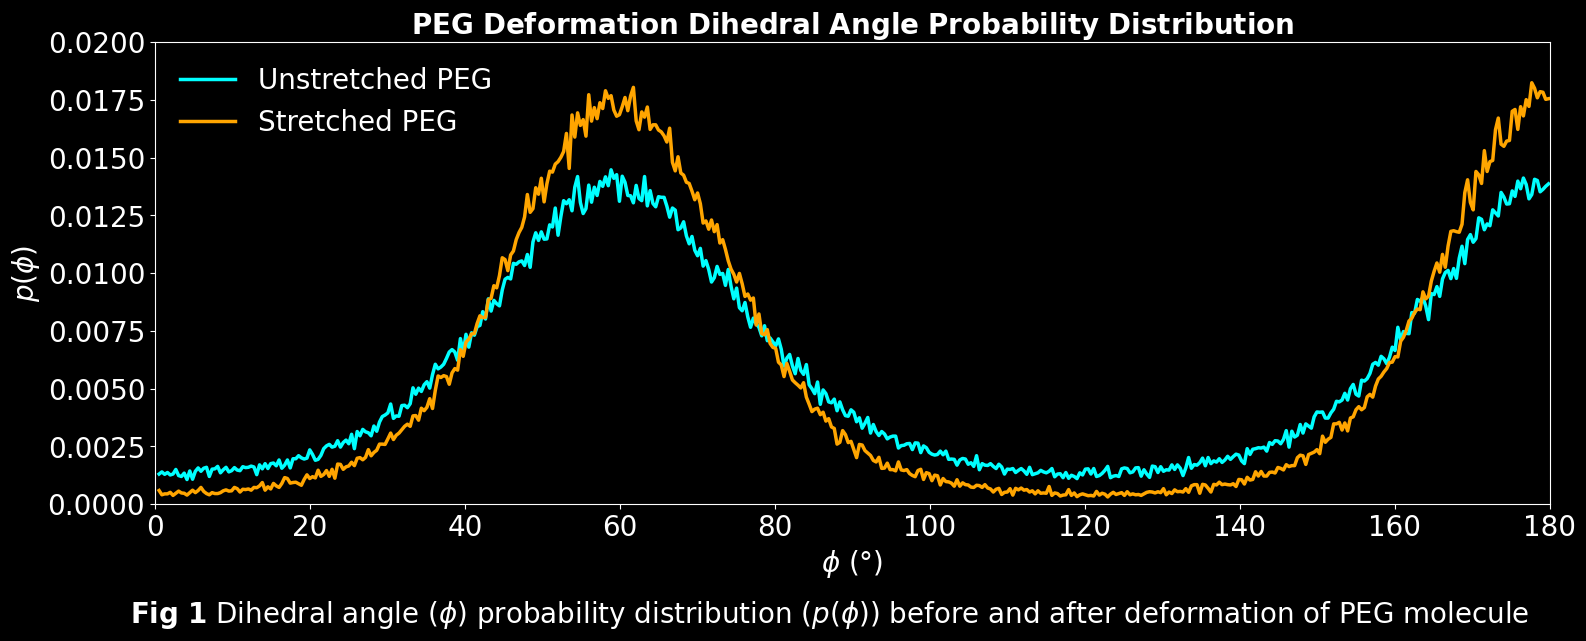

In [4]:
# Create 'H2O-PEG(O) RDF vs distance' line graph
LineGraph.single_line_graph(
    data_arrays=dihedrals_probability_density_vs_angle_data_array,
    figure_size=(18, 6),
    line_labels=['Unstretched PEG', 'Stretched PEG'],
    line_colours=['cyan', 'orange'],
    x_label=r'$\phi$ (°)',
    y_label=r'$p (\phi)$',
    y_lim=(0.00, 0.02),
    x_lim=(0, 180),
    graph_title=r'$\bf{PEG\ Deformation\ Dihedral\ Angle\ Probability\ Distribution}$',
    figure_text=r'$\bf{Fig\ 1}$ Dihedral angle ($\phi$) probability distribution ($p (\phi)$) before and after '
                r'deformation of PEG molecule',
    figure_text_font_size=20,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.075,
    font_size=20,
    tick_label_size=20,
    line_width=2.5,
    save_path=os.path.join(base_dir, '../reports/figures/graphs/PEG-deformation-probability-vs-dihedrals.png'),
    line_labels_position='upper left'
)